# Прогноз музыкального жанра

## Цель: 

`создать модель для предсказания встроенных жанров: предсказать значение «music_genre» для каждого трека из датасета.`


## Данные: 

    * train.csv - информация о 40000 музыкальных треков, которые будут использоваться в качестве обучающих данных.
    * test.csv - информация о 10000 музыкальных треков, которые будут использоваться в качестве тестовых данных.
    * sample_submit.csv - файл предсказаний в правильном формате.
    * instance_id - идентификатор трека в тестовом наборе.
    * music_genre - целевой признак. Для каждого трека предскажите категориальное значение, соответствующее музыкальному жанру трека.
    
## Описание полей:

    * instance_id - уникальный идентификатор трека.
    * track_name - название трека.
    * popularity - популярность трека.
    * acousticness - мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.
    * danceability - танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.
    * duration_ms - продолжительность трека в миллисекудах.
    * energy - энергия - это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра.
    * instrumentalness - определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала.
    * key - базовый ключ (нота) произведения.
    * liveness - определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую.
    * loudness - общая громкость трека в децибелах (дБ).
    * mode - указывает на модальность (мажорную или минорную) трека.
    * speechiness - речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.
    * tempo - темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов.
    * obtained_date - дата загрузки в сервис.
    * valence - показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито).
    * music_genre - музыкальный жанр трека.

## ЗАГРУЗКА БИБЛИОТЕК

In [1]:
! pip install phik -q

In [2]:
! pip install shap -q

In [3]:
! pip install Numpy==1.23.5 -q

In [4]:
! pip install --upgrade matplotlib -q

In [5]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

import phik
from phik.report import plot_correlation_matrix
from phik import report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats as st

from patsy import dmatrices

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, roc_auc_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import (
    accuracy_score, 
    recall_score, 
    precision_score, 
    confusion_matrix, 
    matthews_corrcoef, 
    f1_score, 
    cohen_kappa_score
)

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVR

import shap

import warnings
warnings.filterwarnings("ignore")

C:\Users\olian\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## ЗАГРУЗКА ДАННЫХ И ПРЕДОБРАБОТКА
<a id="part_1.1"></a> 

**ЗАГРУЗИМ ФАЙЛ С ТРЕНИРОВОЧНОЙ ВЫБОРКОЙ**

In [6]:
sample = pd.read_csv(r'C:\Users\olian\Desktop\Мастерская 1 DS\sample_submission.csv')

In [7]:
train = pd.read_csv(r'C:\Users\olian\Desktop\Мастерская 1 DS\kaggle_music_genre_train.csv')

In [8]:
test = pd.read_csv(r'C:\Users\olian\Desktop\Мастерская 1 DS\kaggle_music_genre_test.csv')

In [9]:
# напишем функцию, выполняющую предварительное исследование данных: 
# размер датасета, тип данных, количество уникальных значений по столбцам и дубликаты 
def pre(df):
# выведем информацию по типу данных и объему датасета
    display(df.head(5))
    df.info() 
# составим список столбцов датасета
    cols = df.columns.tolist()    
    for i in cols:
# выведем количество уникальных значений по каждому столбцу
        print('Количество уникальных значений в столбце ' + i)
        display(df[i].value_counts())
# выведем количество пропущенных значений по каждому столбцу 
        print('Количество пропущенных значений в столбце ' + i)
        display(df[i].isna().sum())
# при наличии пропущенных значений в категориальных столбцах заменим их модой
    #cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    #for i in cat_cols:
        #mode = df[i].mode()[0]
        #df[i].fillna(mode, inplace=True)
                                      
    print('Таблица, содержащая пропущенные значения по столбцам')    
    df_1 = df[df.isna().any(axis=1)]
    display(df_1.head(5))
    print('Количество явных дубликатов') 
    print(df.duplicated().sum())
    return df

In [10]:
train = pre(train)

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,28097,NaN,38.0,0.0455,NaN,152427.0,0.636,0.020200,F#,0.111,-9.109,Minor,0.0591,167.357,4-Apr,0.597,Country
1,49793,Uber Everywhere,67.0,0.0542,0.779,-1.0,0.455,0.000000,C#,0.177,-15.025,Major,0.2800,140.181,4-Apr,0.197,Rap
2,41545,Love Is All,37.0,0.5830,0.660,311008.0,0.650,0.056200,D,0.398,-7.738,Minor,0.0288,?,NaN,0.692,Jazz
3,23453,NaN,69.0,0.0122,0.680,200000.0,0.597,0.000599,E,0.114,-7.198,Minor,0.0304,120.052,4-Apr,0.300,Hip-Hop
4,33933,Should Have Known Better,64.0,0.9790,0.571,307698.0,0.172,0.275000,G,0.124,-20.700,Major,0.0318,90.97200000000001,4-Apr,0.297,Rock


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       40000 non-null  int64  
 1   track_name        29324 non-null  object 
 2   popularity        36063 non-null  float64
 3   acousticness      40000 non-null  float64
 4   danceability      37954 non-null  float64
 5   duration_ms       40000 non-null  float64
 6   energy            40000 non-null  float64
 7   instrumentalness  40000 non-null  float64
 8   key               38624 non-null  object 
 9   liveness          40000 non-null  float64
 10  loudness          40000 non-null  float64
 11  mode              38174 non-null  object 
 12  speechiness       40000 non-null  float64
 13  tempo             40000 non-null  object 
 14  obtained_date     33738 non-null  object 
 15  valence           40000 non-null  float64
 16  music_genre       40000 non-null  object

instance_id
28097    1
3473     1
5453     1
18742    1
7314     1
        ..
32898    1
34970    1
1027     1
15376    1
18781    1
Name: count, Length: 40000, dtype: int64

Количество пропущенных значений в столбце instance_id


0

Количество уникальных значений в столбце track_name


track_name
Home                                                                                    11
Wake Up                                                                                  9
Forever                                                                                  9
Without You                                                                              9
Someday                                                                                  8
                                                                                        ..
Amethyst                                                                                 1
Sirabhorn                                                                                1
Glycerine                                                                                1
The Sleeping Beauty Suite, Op. 66a (arr. S. Rachmaninov for piano 4 hands): V. Waltz     1
Dna Rhapsody                                                                   

Количество пропущенных значений в столбце track_name


10676

Количество уникальных значений в столбце popularity


popularity
52.0    942
54.0    925
50.0    922
55.0    920
53.0    897
       ... 
99.0      1
91.0      1
97.0      1
92.0      1
96.0      1
Name: count, Length: 98, dtype: int64

Количество пропущенных значений в столбце popularity


3937

Количество уникальных значений в столбце acousticness


acousticness
0.995000    218
0.994000    192
0.993000    164
0.992000    161
0.990000    125
           ... 
0.000005      1
0.006270      1
0.000334      1
0.000087      1
0.009200      1
Name: count, Length: 4063, dtype: int64

Количество пропущенных значений в столбце acousticness


0

Количество уникальных значений в столбце danceability


danceability
0.5290    114
0.5890    104
0.6100    103
0.4990    101
0.5540    100
         ... 
0.0755      1
0.0742      1
0.0600      1
0.0935      1
0.0916      1
Name: count, Length: 1046, dtype: int64

Количество пропущенных значений в столбце danceability


2046

Количество уникальных значений в столбце duration_ms


duration_ms
-1.0         3953
 192000.0      25
 180000.0      25
 240000.0      24
 208000.0      17
             ... 
 472053.0       1
 184360.0       1
 35213.0        1
 187142.0       1
 335320.0       1
Name: count, Length: 22457, dtype: int64

Количество пропущенных значений в столбце duration_ms


0

Количество уникальных значений в столбце energy


energy
0.85900    84
0.67500    81
0.80500    79
0.72000    79
0.83300    77
           ..
0.04560     1
0.02970     1
0.00570     1
0.00584     1
0.06300     1
Name: count, Length: 1990, dtype: int64

Количество пропущенных значений в столбце energy


0

Количество уникальных значений в столбце instrumentalness


instrumentalness
0.000000    12011
0.891000       55
0.897000       54
0.898000       54
0.914000       53
            ...  
0.089900        1
0.000005        1
0.007110        1
0.000004        1
0.003700        1
Name: count, Length: 4970, dtype: int64

Количество пропущенных значений в столбце instrumentalness


0

Количество уникальных значений в столбце key


key
G     4454
C     4253
C#    4178
D     4123
A     3739
F     3283
B     2889
E     2883
A#    2641
G#    2536
F#    2428
D#    1217
Name: count, dtype: int64

Количество пропущенных значений в столбце key


1376

Количество уникальных значений в столбце liveness


liveness
0.1100    501
0.1110    487
0.1080    477
0.1090    442
0.1070    422
         ... 
0.0269      1
0.7360      1
0.8380      1
0.0278      1
0.9850      1
Name: count, Length: 1627, dtype: int64

Количество пропущенных значений в столбце liveness


0

Количество уникальных значений в столбце loudness


loudness
-5.133     15
-3.665     14
-5.606     14
-7.066     13
-4.566     13
           ..
-30.644     1
-30.416     1
-12.286     1
-18.053     1
-19.541     1
Name: count, Length: 16803, dtype: int64

Количество пропущенных значений в столбце loudness


0

Количество уникальных значений в столбце mode


mode
Major    24553
Minor    13621
Name: count, dtype: int64

Количество пропущенных значений в столбце mode


1826

Количество уникальных значений в столбце speechiness


speechiness
0.0332    140
0.0337    125
0.0315    124
0.0329    123
0.0358    120
         ... 
1.0358      1
0.5670      1
1.0730      1
1.2910      1
0.9040      1
Name: count, Length: 2019, dtype: int64

Количество пропущенных значений в столбце speechiness


0

Количество уникальных значений в столбце tempo


tempo
?                     3996
100.00299999999999      15
130.016                 14
140.011                 13
140.007                 13
                      ... 
179.764                  1
99.72399999999999        1
112.215                  1
151.505                  1
171.882                  1
Name: count, Length: 25010, dtype: int64

Количество пропущенных значений в столбце tempo


0

Количество уникальных значений в столбце obtained_date


obtained_date
4-Apr    30192
3-Apr     2718
5-Apr      553
1-Apr      274
0/4          1
Name: count, dtype: int64

Количество пропущенных значений в столбце obtained_date


6262

Количество уникальных значений в столбце valence


valence
0.3380    85
0.3320    74
0.3620    72
0.3470    71
0.4740    71
          ..
0.0251     1
0.0450     1
0.0988     1
0.0516     1
0.0614     1
Name: count, Length: 1594, dtype: int64

Количество пропущенных значений в столбце valence


0

Количество уникальных значений в столбце music_genre


music_genre
Alternative    4059
Jazz           4055
Electronic     4020
Anime          4017
Blues          3987
Country        3985
Rap            3980
Classical      3980
Rock           3960
Hip-Hop        3957
Name: count, dtype: int64

Количество пропущенных значений в столбце music_genre


0

Таблица, содержащая пропущенные значения по столбцам


,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,28097,NaN,38.0,0.04550,NaN,152427.0,0.636,0.020200,F#,0.1110,-9.109,Minor,0.0591,167.357,4-Apr,0.597,Country
2,41545,Love Is All,37.0,0.58300,0.660,311008.0,0.650,0.056200,D,0.3980,-7.738,Minor,0.0288,?,NaN,0.692,Jazz
3,23453,NaN,69.0,0.01220,0.680,200000.0,0.597,0.000599,E,0.1140,-7.198,Minor,0.0304,120.052,4-Apr,0.300,Hip-Hop
5,3872,NaN,68.0,0.00242,0.585,237040.0,0.842,0.006860,A,0.0866,-75.883,NaN,0.0556,118.211,4-Apr,0.428,Rock
7,47456,Under The Water,51.0,0.05390,0.611,203915.0,0.644,0.000000,NaN,0.0802,-5.394,Major,0.0750,144.041,4-Apr,0.440,Rock


Количество явных дубликатов
0


**Вывод по датасету:** 
* 1. Датасет состоит из 40000 строк и 17 столбцов. 
* 2. столбец `'instance_id'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 3. столбец `'track_name'` содержит `10627` `(~ 27 %)` пропущенных значений, тип данных соответствует содержимому.
* 4. столбец `'popularity'` содержит `3937` `(~ 10 %)` пропущенных значений, тип данных можно `заменить на int`.  
* 5. столбец `'acousticness'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 6. столбец `'danceability'` содержит `2046` `(~ 5 %)` пропущенных значений, тип данных соответствует содержимому.
* 7. столбец `'duration_ms'` не содержит пропущенных значений, тип данных можно `заменить на int`.
* 8. столбец `'energy'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 9. столбец `'instrumentalness'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 10. столбец `'key'` содержит `1376` `(~ 3,4 %)` пропущенных значений, тип данных соответствует содержимому.
* 11. столбец `'liveness'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 12. столбец `'loudness'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 13. столбец `'mode'` содержит `1826` `(~ 4,6 %)` пропущенных значений, тип данных соответствует содержимому.
* 14. столбец `'speechiness'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 15. столбец `'tempo'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 16. столбец `'obtained_date'` содержит `6262` `(~ 15,7 %)` пропущенных значений, тип данных можно `заменить на datetime`.
* 17. столбец `'valence'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 18. столбец `'music_genre'` не содержит пропущенных значений, тип данных соответствует содержимому.

**ЗАГРУЗИМ ФАЙЛ С ВХОДНЫМИ ПРИЗНАКАМИ ТЕСТОВОЙ ВЫБОРКИ**

In [11]:
test = pre(test)

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,32911,Pretty Green,30.0,0.09310,0.429,249640.0,0.862,0.000001,D,0.1610,-5.696,Major,0.0760,177.023,NaN,0.335
1,30681,Son Of The Sun,45.0,0.07120,0.507,190253.0,0.754,0.000045,A,0.3180,-6.921,Major,0.0324,?,4-Apr,0.582
2,9640,NaN,59.0,0.00413,0.559,276707.0,0.912,0.000000,F,0.0567,-6.799,Major,0.0608,103.13,4-Apr,0.653
3,40204,How I Could Just Kill a Man,61.0,0.00114,0.598,244693.0,0.939,0.000009,G,0.2880,-3.663,Major,0.1050,95.884,4-Apr,0.630
4,11034,Handsome And Wealthy,62.0,0.00348,0.858,210557.0,0.665,0.000000,NaN,0.0940,-2.907,Major,0.1010,146.031,4-Apr,0.237


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       10000 non-null  int64  
 1   track_name        7326 non-null   object 
 2   popularity        9002 non-null   float64
 3   acousticness      10000 non-null  float64
 4   danceability      9486 non-null   float64
 5   duration_ms       10000 non-null  float64
 6   energy            10000 non-null  float64
 7   instrumentalness  10000 non-null  float64
 8   key               9626 non-null   object 
 9   liveness          10000 non-null  float64
 10  loudness          10000 non-null  float64
 11  mode              9491 non-null   object 
 12  speechiness       10000 non-null  float64
 13  tempo             10000 non-null  object 
 14  obtained_date     8462 non-null   object 
 15  valence           10000 non-null  float64
dtypes: float64(10), int64(1), object(5)
memor

instance_id
32911    1
24234    1
9119     1
37681    1
13106    1
        ..
27390    1
3319     1
32841    1
46310    1
38082    1
Name: count, Length: 10000, dtype: int64

Количество пропущенных значений в столбце instance_id


0

Количество уникальных значений в столбце track_name


track_name
Paradise                             4
Fire                                 4
Blue                                 4
These Days                           4
Summertime                           3
                                    ..
Soldier (feat. T.I. & Lil' Wayne)    1
If I Could Fly                       1
True color                           1
Gates of Glory                       1
Come With Us                         1
Name: count, Length: 7078, dtype: int64

Количество пропущенных значений в столбце track_name


2674

Количество уникальных значений в столбце popularity


popularity
54.0    242
52.0    241
56.0    234
53.0    234
50.0    225
       ... 
6.0       1
91.0      1
87.0      1
96.0      1
88.0      1
Name: count, Length: 93, dtype: int64

Количество пропущенных значений в столбце popularity


998

Количество уникальных значений в столбце acousticness


acousticness
0.995000    60
0.992000    54
0.994000    48
0.991000    38
0.993000    34
            ..
0.000596     1
0.092500     1
0.000044     1
0.000209     1
0.000658     1
Name: count, Length: 2854, dtype: int64

Количество пропущенных значений в столбце acousticness


0

Количество уникальных значений в столбце danceability


danceability
0.4830    33
0.6440    32
0.5480    31
0.6150    29
0.5960    29
          ..
0.0899     1
0.9720     1
0.0876     1
0.0936     1
0.1030     1
Name: count, Length: 909, dtype: int64

Количество пропущенных значений в столбце danceability


514

Количество уникальных значений в столбце duration_ms


duration_ms
-1.0         986
 240000.0      9
 192000.0      7
 214400.0      6
 186000.0      6
            ... 
 196760.0      1
 236693.0      1
 220427.0      1
 47320.0       1
 297627.0      1
Name: count, Length: 7734, dtype: int64

Количество пропущенных значений в столбце duration_ms


0

Количество уникальных значений в столбце energy


energy
0.7590    24
0.8050    24
0.6750    22
0.8920    22
0.9360    22
          ..
0.0376     1
0.0920     1
0.0901     1
0.0703     1
0.0350     1
Name: count, Length: 1388, dtype: int64

Количество пропущенных значений в столбце energy


0

Количество уникальных значений в столбце instrumentalness


instrumentalness
0.000000    2990
0.902000      17
0.861000      17
0.898000      16
0.923000      16
            ... 
0.115000       1
0.296000       1
0.000842       1
0.000807       1
0.000021       1
Name: count, Length: 3223, dtype: int64

Количество пропущенных значений в столбце instrumentalness


0

Количество уникальных значений в столбце key


key
C     1064
G     1059
C#    1052
D      968
A      901
F      899
B      781
E      761
G#     654
A#     603
F#     561
D#     323
Name: count, dtype: int64

Количество пропущенных значений в столбце key


374

Количество уникальных значений в столбце liveness


liveness
0.1080    133
0.1100    124
0.1110    122
0.1070    120
0.1040    111
         ... 
0.5100      1
0.0434      1
0.0597      1
0.8570      1
0.0425      1
Name: count, Length: 1334, dtype: int64

Количество пропущенных значений в столбце liveness


0

Количество уникальных значений в столбце loudness


loudness
-5.120     8
-6.960     7
-6.097     6
-5.204     6
-5.375     6
          ..
-11.784    1
-9.503     1
-9.005     1
-9.000     1
-4.768     1
Name: count, Length: 7374, dtype: int64

Количество пропущенных значений в столбце loudness


0

Количество уникальных значений в столбце mode


mode
Major    6069
Minor    3422
Name: count, dtype: int64

Количество пропущенных значений в столбце mode


509

Количество уникальных значений в столбце speechiness


speechiness
0.0362    36
0.0331    34
0.0321    34
0.0303    34
0.0322    33
          ..
1.3180     1
1.0292     1
0.0916     1
1.0731     1
1.0435     1
Name: count, Length: 1493, dtype: int64

Количество пропущенных значений в столбце speechiness


0

Количество уникальных значений в столбце tempo


tempo
?                     984
120.0                   8
120.015                 7
83.965                  5
139.983                 5
                     ... 
123.277                 1
62.053000000000004      1
179.007                 1
120.949                 1
109.955                 1
Name: count, Length: 7979, dtype: int64

Количество пропущенных значений в столбце tempo


0

Количество уникальных значений в столбце obtained_date


obtained_date
4-Apr    7570
3-Apr     715
5-Apr     121
1-Apr      56
Name: count, dtype: int64

Количество пропущенных значений в столбце obtained_date


1538

Количество уникальных значений в столбце valence


valence
0.3240    26
0.3040    26
0.4390    26
0.5190    24
0.3860    24
          ..
0.0748     1
0.0287     1
0.9140     1
0.0534     1
0.0959     1
Name: count, Length: 1316, dtype: int64

Количество пропущенных значений в столбце valence


0

Таблица, содержащая пропущенные значения по столбцам


,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,32911,Pretty Green,30.0,0.09310,0.429,249640.0,0.862,0.000001,D,0.1610,-5.696,Major,0.0760,177.023,NaN,0.335
2,9640,NaN,59.0,0.00413,0.559,276707.0,0.912,0.000000,F,0.0567,-6.799,Major,0.0608,103.13,4-Apr,0.653
4,11034,Handsome And Wealthy,62.0,0.00348,0.858,210557.0,0.665,0.000000,NaN,0.0940,-2.907,Major,0.1010,146.031,4-Apr,0.237
6,49499,NaN,NaN,0.00896,0.532,201600.0,0.937,0.000002,A,0.2160,-0.937,Minor,0.0686,75.025,4-Apr,0.393
9,28937,Big Poppa,75.0,0.43200,0.778,252747.0,0.578,0.000000,A,0.1380,-7.220,NaN,0.2740,84.48700000000001,4-Apr,0.758


Количество явных дубликатов
0


**Вывод по датасету:** 
* 1. Датасет состоит из 10000 строк и 16 столбцов. 
* 2. столбец `'instance_id'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 3. столбец `'track_name'` содержит `2764` `(~ 27,6 %)` пропущенных значений, тип данных соответствует содержимому.
* 4. столбец `'popularity'` содержит `998` `(~ 10 %)` пропущенных значений, тип данных можно `заменить на int`.  
* 5. столбец `'acousticness'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 6. столбец `'danceability'` содержит `514` `(~ 5 %)` пропущенных значений, тип данных соответствует содержимому.
* 7. столбец `'duration_ms'` не содержит пропущенных значений, тип данных можно `заменить на int`.
* 8. столбец `'energy'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 9. столбец `'instrumentalness'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 10. столбец `'key'` содержит `374` `(~ 3,7 %)` пропущенных значений, тип данных соответствует содержимому.
* 11. столбец `'liveness'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 12. столбец `'loudness'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 13. столбец `'mode'` содержит `509` `(~ 5 %)` пропущенных значений, тип данных соответствует содержимому.
* 14. столбец `'speechiness'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 15. столбец `'tempo'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 16. столбец `'obtained_date'` содержит `1538` `(~ 15,4 %)` пропущенных значений, тип данных можно `заменить на datetime`.
* 17. столбец `'valence'` не содержит пропущенных значений, тип данных соответствует содержимому.
* 18. столбец `'music_genre'` не содержит пропущенных значений, тип данных соответствует содержимому.

**ЗАГРУЗИМ ФАЙЛ С ЦЕЛЕВЫМ ПРИЗНАКОМ ТЕСТОВОЙ ВЫБОРКИ**

In [12]:
sample = pre(sample)

,instance_id,music_genre
0,32911,Rap
1,30681,Country
2,9640,Classical
3,40204,Anime
4,11034,Country


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instance_id  10000 non-null  int64 
 1   music_genre  10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB
Количество уникальных значений в столбце instance_id


instance_id
32911    1
24234    1
9119     1
37681    1
13106    1
        ..
27390    1
3319     1
32841    1
46310    1
38082    1
Name: count, Length: 10000, dtype: int64

Количество пропущенных значений в столбце instance_id


0

Количество уникальных значений в столбце music_genre


music_genre
Hip-Hop        1043
Rock           1040
Rap            1020
Classical      1020
Country        1015
Blues          1013
Anime           983
Electronic      980
Jazz            945
Alternative     941
Name: count, dtype: int64

Количество пропущенных значений в столбце music_genre


0

Таблица, содержащая пропущенные значения по столбцам


,instance_id,music_genre


Количество явных дубликатов
0


**Вывод по датасету:** 

    * Датасет содержит 10000 строк и 2 столбца. Не содержит пропущенных значений. Типы данных соответствуют содержимому.

In [13]:
def rep(df):
    df['key'] = df['key'].str.replace('A#', 'A')
    df['key'] = df['key'].str.replace('C#', 'C')
    df['key'] = df['key'].str.replace('D#', 'D')
    df['key'] = df['key'].str.replace('F#', 'F')
    df['key'] = df['key'].str.replace('G#', 'G')
    df['duration_ms'] = df['duration_ms'].replace(-1, 0)
    df['tempo'] = df['tempo'].str.replace('?', '0')
    df['tempo'] = df['tempo'].astype('float')
    return df

In [14]:
train = rep(train)
test = rep(test)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       40000 non-null  int64  
 1   track_name        29324 non-null  object 
 2   popularity        36063 non-null  float64
 3   acousticness      40000 non-null  float64
 4   danceability      37954 non-null  float64
 5   duration_ms       40000 non-null  float64
 6   energy            40000 non-null  float64
 7   instrumentalness  40000 non-null  float64
 8   key               38624 non-null  object 
 9   liveness          40000 non-null  float64
 10  loudness          40000 non-null  float64
 11  mode              38174 non-null  object 
 12  speechiness       40000 non-null  float64
 13  tempo             40000 non-null  float64
 14  obtained_date     33738 non-null  object 
 15  valence           40000 non-null  float64
 16  music_genre       40000 non-null  object

## ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ (EDA)
<a id="part_1.2"></a> 

**ПРОВЕДЕМ ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ПО ДАННЫМ ТРЕНИРОВОЧНОЙ ВЫБОРКИ**

In [16]:
train = train.query('speechiness <=1')

In [17]:
#train.info()

In [18]:
def research(df):
    num_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
    del num_cols[0]
    print('Построим диаграмму "ящик с усами" для определения выбросов в данных')
    for i in num_cols:
        fig, ax = plt.subplots(figsize=(3, 3))
        sns.boxplot(y=i, data=df, ax=ax)
        plt.title(i)
        plt.ylabel(i)
        plt.show();
     # проведем расчет числовых характеристик
    print('Проведем расчет числовых характеристик для числовых значений признаков')
    display(df.drop('instance_id', axis = 1).describe())
   
    # выполним проверку гипотез о нормальности распределения признаков
    print('Проверим гипотезу о нормальности распределения величин')
    print('H0 - распределение нормально')
    print('H1 - распределение ненормально')
    for i in num_cols:
        d = df[i]
        alpha = 0.05  
        results = st.shapiro(d)
        p_value = results[1]
        print(i)
        print('p-значение: ', p_value)
        if p_value < alpha:
            print('Отвергаем нулевую гипотезу: распределение ненормально')
        else:
            print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 
    print('')
    # построим гистограммы для исследования распределения признаков
    print('Построим гистограммы распределения значений числовых признаков')
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(24,18))
    axes_list = [item for sublist in axes for item in sublist]
    for i in num_cols:
        ax = axes_list.pop(0)
        df.hist(i, figsize=(6, 3), ax=ax, bins=13)
    plt.show();
    print('Построим матрицу рассеяния значений числовых признаков')
    pd.plotting.scatter_matrix(df.drop('instance_id',axis=1), figsize=(25, 15), diagonal='kde')
    plt.show();

Построим диаграмму "ящик с усами" для определения выбросов в данных


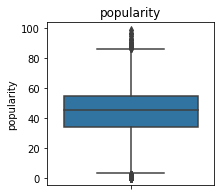

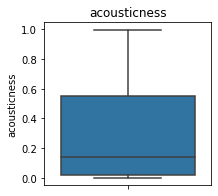

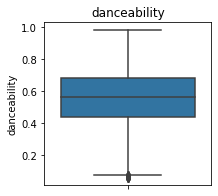

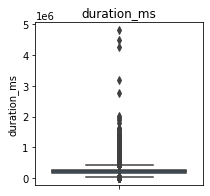

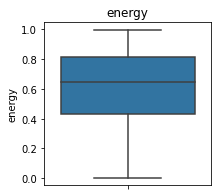

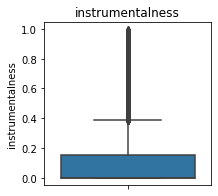

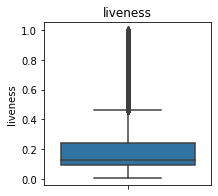

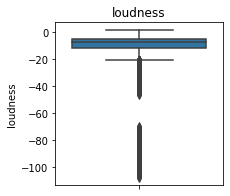

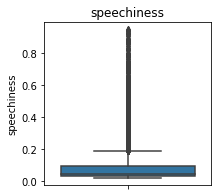

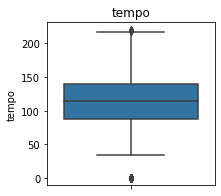

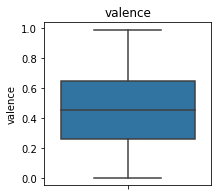

Проведем расчет числовых характеристик для числовых значений признаков


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,34751.000000,38554.000000,36577.000000,3.855400e+04,38554.000000,38554.000000,38554.000000,38554.000000,38554.000000,38554.000000,38554.000000
mean,44.126155,0.305552,0.558233,2.211736e+05,0.600479,0.181378,0.193711,-11.639772,0.093751,108.001725,0.457158
std,15.551040,0.341253,0.178172,1.300478e+05,0.264408,0.325097,0.160691,14.458380,0.101472,46.224463,0.247168
min,0.000000,0.000000,0.059600,0.000000e+00,0.000792,0.000000,0.009670,-108.358000,0.022300,0.000000,0.000000
25%,34.000000,0.019900,0.442000,1.748195e+05,0.433000,0.000000,0.096900,-11.514500,0.036100,87.988250,0.258000
50%,45.000000,0.143000,0.568000,2.191800e+05,0.644000,0.000150,0.127000,-7.450000,0.048900,113.660000,0.451000
75%,55.000000,0.551000,0.686000,2.685968e+05,0.817000,0.154000,0.243000,-5.244000,0.098700,139.561250,0.649000
max,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.994000,1.000000,1.949000,0.942000,220.276000,0.992000


Проверим гипотезу о нормальности распределения величин
H0 - распределение нормально
H1 - распределение ненормально
popularity
p-значение:  1.0
Не получилось отвергнуть нулевую гипотезу, всё нормально
acousticness
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение ненормально
danceability
p-значение:  1.0
Не получилось отвергнуть нулевую гипотезу, всё нормально
duration_ms
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение ненормально
energy
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение ненормально
instrumentalness
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение ненормально
liveness
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение ненормально
loudness
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение ненормально
speechiness
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение ненормально
tempo
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение ненормально
valence
p-значение:  0.0
Отвергаем нулевую гипотезу: распред

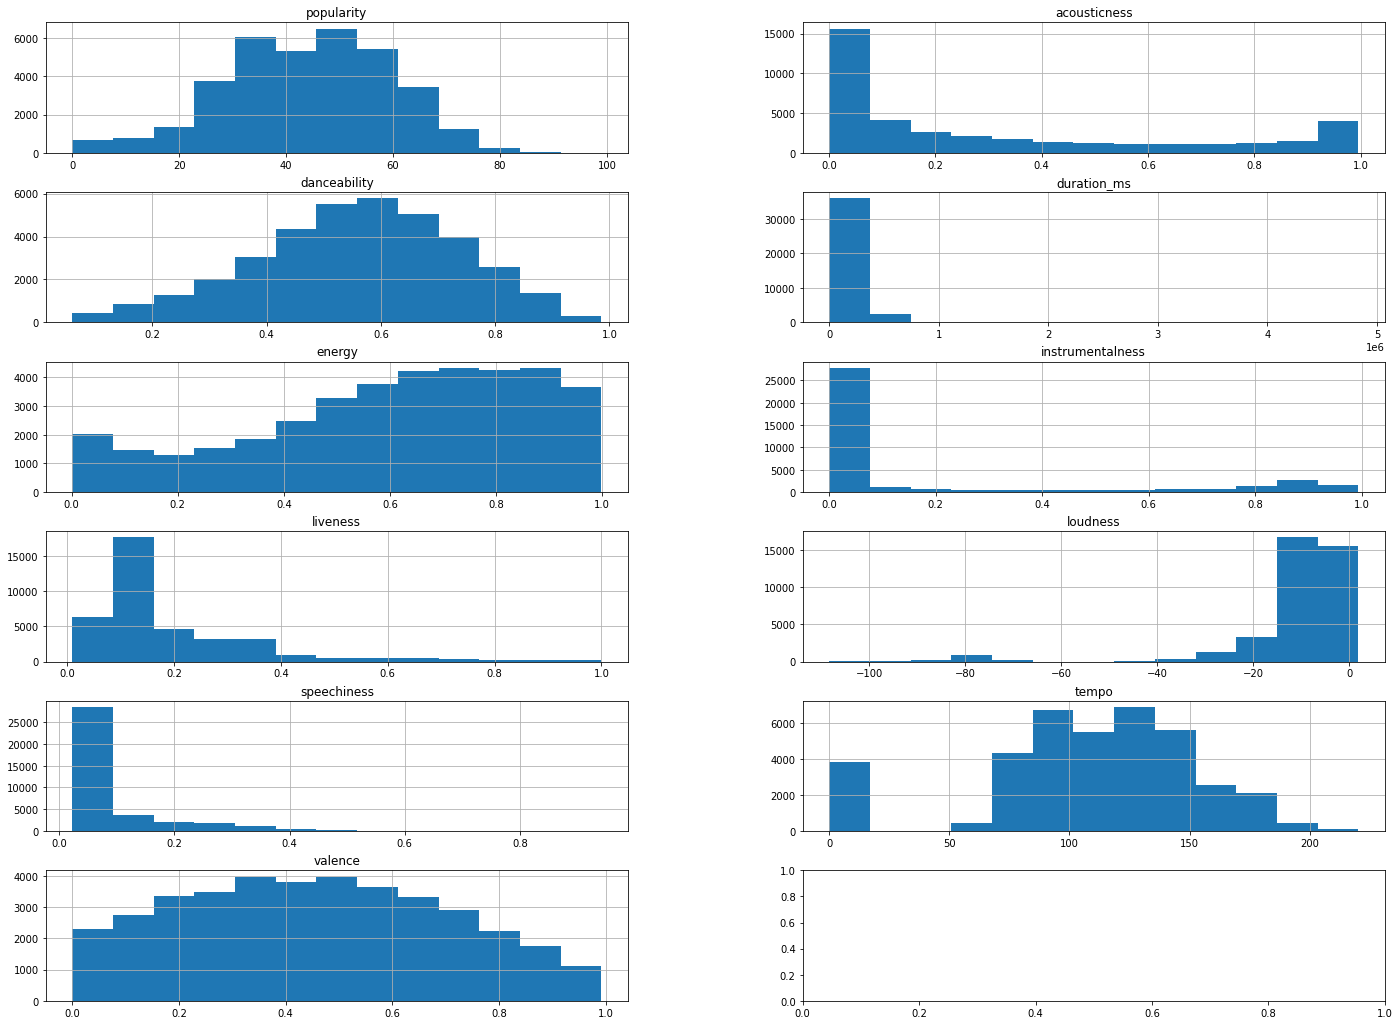

Построим матрицу рассеяния значений числовых признаков


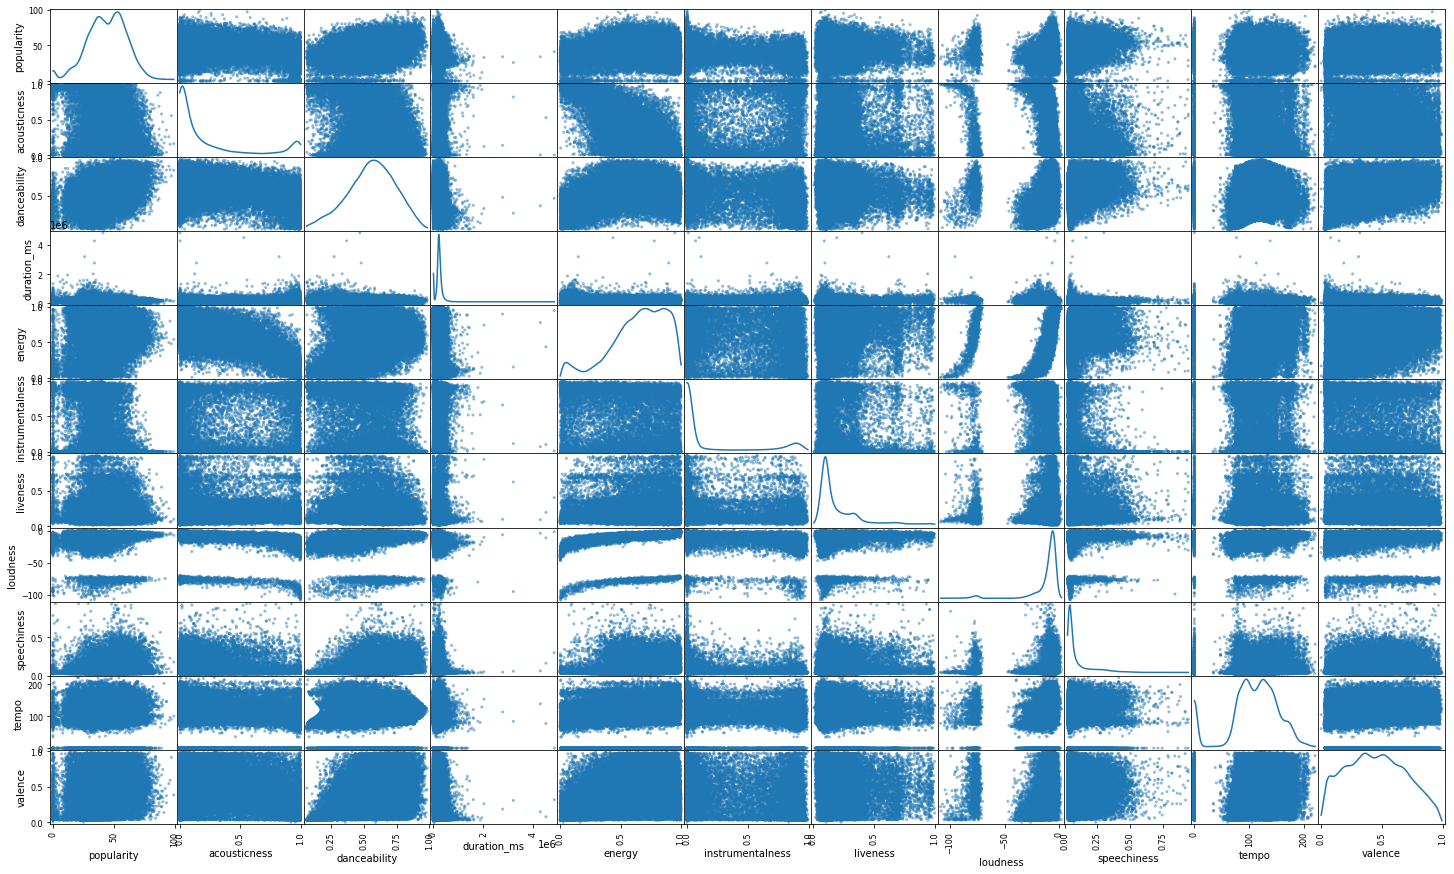

In [19]:
train_r = research(train)

При построении матрицы корреляции не берем в расчет признак `track_name`, `instance_id` и `obtained_date`. Данные признаки не несут существенного влияния на целевой признак.

In [20]:
def corr_an(df):
    df = df.drop(['instance_id', 'track_name'], axis = 1)
    num_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
    phik_corr = df.phik_matrix(interval_cols = num_cols)
    plot_correlation_matrix(phik_corr.values, 
                        x_labels=phik_corr.columns, 
                        y_labels=phik_corr.index, 
                        vmin=0, vmax=1, color_map="coolwarm",
                        title=r"Матрица корреляции (библиотека Phik)", 
                        fontsize_factor=1, 
                        figsize=(12, 6))
    plt.tight_layout()

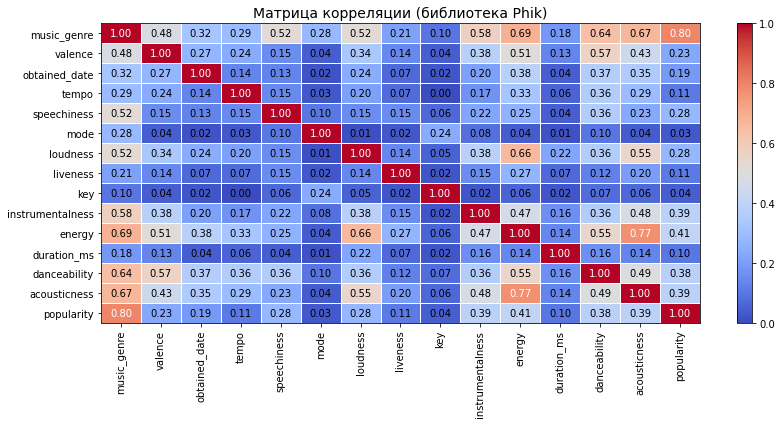

In [21]:
train_c = corr_an(train)

По матрице согласно шкале Чеддока видно, что:

        имеется высокая (0.7-0.9) взаимосвязь между `music_genre` и: `popularity` (0.8)
        имеется заметная связь (0.5-0.7) между `music_genre` и: `loudness`(0.52), `instrumentalness` (0.58), `energy` (0,69), `danceability` (0.64), `acousticness` (0.67).
        между признаками `valence` и: `energy` (0.51) и `danceability` (0.57) имеется заметная связь.
        между признаками `loudness` и: `energy` (0.66) и `acousticness` (0.55) имеется заметная связь.
        между признаками `energy` и: `valence` (0.51), `loudness` (0.66), `danceability` (0.55), `acousticness` (0.77) имеется заметная связь.
        между признаками `danceability` и: `valence` (0.57) и `energy` (0.55) имеется заметная связь.
        между признаками `acousticness` и: `loudness` (0.55) и `energy` (0.77) имеется заметная связь. 
        высокая и заметная  связь наблюдается между `tempo` и большинством признаков, кроме `mode` и `music_genre`

In [22]:
# Исследуем мультиколлинеарность с помощью коэффициента инфляции дисперсии (VIF), 
# который измеряет корреляцию и силу корреляции между независимыми переменными
def vif(i, j):
    y, X = dmatrices(i, data=j, return_type='dataframe')
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] =vif['VIF'].round(3)
    vif['variable'] = X.columns
    display(vif)
print('music_genre ~ popularity+acousticness+danceability+duration_ms+energy+instrumentalness+key+liveness+\
loudness+mode+speechiness+obtained_date+valence+tempo')
v_1 = vif('music_genre ~ popularity+acousticness+danceability+duration_ms+energy+instrumentalness+key+liveness+\
loudness+mode+speechiness+obtained_date+valence+tempo', train)

music_genre ~ popularity+acousticness+danceability+duration_ms+energy+instrumentalness+key+liveness+loudness+mode+speechiness+obtained_date+valence+tempo


,VIF,variable
0,25659.570,Intercept
1,1.351,key[T.B]
2,1.863,key[T.C]
3,1.619,key[T.D]
4,1.347,key[T.E]
5,1.622,key[T.F]
6,1.744,key[T.G]
7,1.091,mode[T.Minor]
8,205.498,obtained_date[T.1-Apr]
9,1885.785,obtained_date[T.3-Apr]


**Значение VIF начинается с 1 и не имеет верхнего предела. Общее эмпирическое правило для интерпретации VIF выглядит следующим образом:**
* Значение 1 указывает на отсутствие корреляции между данной независимой переменной и любыми другими независимыми переменными в модели.
* Значение от 1 до 5 указывает на умеренную корреляцию между данной объясняющей переменной и другими независимыми переменными в модели, но часто она недостаточно серьезна, чтобы требовать внимания.
* Значение больше 5 указывает на потенциально сильную корреляцию между данной независимой переменной и другими независимыми переменными в модели. В этом случае оценки коэффициентов и p-значения в выходных данных регрессии, вероятно, ненадежны.

**В нашем случае коэффициенты признаков "obtained_date" намного больше 5, что говорит об довольно сильной корреляции между признаками, а следовательно можно полагать, что мультиколлинеарность имеется, но данные признаки не коррелируют с целевым, в любом случае данный признак удалим.**

In [23]:
RANDOM_STATE = 51
TEST_SIZE = 0.25

X = train.drop(['track_name', 'instance_id', 'obtained_date', 'music_genre'], axis=1)
y = train['music_genre']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

X_train.shape, X_test.shape

# создайте экземпляр класса LabelEncoder для кодирования целевого признака

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
#y = label_encoder.fit_transform(y)

# создаём списки с названиями признаков
ohe_columns = ['mode', 'key']
num_columns = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness',\
'loudness', 'speechiness', 'valence', 'tempo']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE

ohe_pipe = Pipeline([('simpleImputer_before_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
   ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)),
                   ('simpleImputer_after_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

num_pipe = Pipeline([('num', SimpleImputer(strategy='median')), StandardScaler()])
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', num_pipe, num_columns)]
    , remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight= 'balanced'))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 15),
        'models__max_features': range(2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__kernel': ['linear','rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
    
   {
        'models': [RandomForestClassifier(
            n_estimators = [100,300,500,700],
            max_features = ['n_features'],
            max_depth = [2,3,7,11,15],
            min_samples_split = [2,3,4,22,23,24],
            min_samples_leaf = [2,3,4,5,6,7],
            bootstrap = [False])],
       'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    } 
]

y_train = label_encoder.inverse_transform(y_train)
y_test = label_encoder.inverse_transform(y_test)
#y = label_encoder.inverse_transform(y)

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='f1_micro',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)


# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
#y_test_pred = randomized_search.predict(X)
#print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_before_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('simpleImputer_after_ohe',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                     

In [24]:
RANDOM_STATE = 51
TEST_SIZE = 0.25
display(test)
XX = test.drop(['track_name', 'instance_id', 'obtained_date'], axis=1)
test['music_genre'] = pd.DataFrame(randomized_search.predict(XX))
test = test[['instance_id', 'music_genre']]

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,32911,Pretty Green,30.0,0.093100,0.429,249640.0,0.862,0.000001,D,0.1610,-5.696,Major,0.0760,177.023,NaN,0.335
1,30681,Son Of The Sun,45.0,0.071200,0.507,190253.0,0.754,0.000045,A,0.3180,-6.921,Major,0.0324,0.000,4-Apr,0.582
2,9640,NaN,59.0,0.004130,0.559,276707.0,0.912,0.000000,F,0.0567,-6.799,Major,0.0608,103.130,4-Apr,0.653
3,40204,How I Could Just Kill a Man,61.0,0.001140,0.598,244693.0,0.939,0.000009,G,0.2880,-3.663,Major,0.1050,95.884,4-Apr,0.630
4,11034,Handsome And Wealthy,62.0,0.003480,0.858,210557.0,0.665,0.000000,NaN,0.0940,-2.907,Major,0.1010,146.031,4-Apr,0.237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39792,Drifter,39.0,0.012600,0.771,453497.0,0.543,0.843000,F,0.0895,-10.261,Minor,0.0331,122.019,4-Apr,0.391
9996,35928,Build Your Kingdom Here,53.0,0.021800,0.456,257960.0,0.508,0.000000,D,0.2370,-14.339,Major,0.0402,133.965,4-Apr,0.553
9997,16758,Kicking and Screaming,30.0,0.000658,0.546,215957.0,0.847,0.867000,G,0.0848,-6.927,Major,0.0524,94.997,4-Apr,0.557
9998,18788,Raphtalia,NaN,0.982000,0.318,94613.0,0.201,0.962000,G,0.1040,-16.899,Major,0.0670,165.866,4-Apr,0.334


In [25]:
test.to_csv('itog2.csv', index= False)